<a href="https://colab.research.google.com/github/SushanthJanga/INFO6105-DSE/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is pandas ra lawde


In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=d5c1797baa4a440ca065b609e500383d7d2e2ce52e3410bc08d1328c13765298
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [3]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpp45tjnut
  JVM stdout: /tmp/tmpp45tjnut/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpp45tjnut/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_nxwapf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
from google.colab import drive


In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr


In [7]:
sns.set(rc={"figure.figsize": (16, 8)})

In [8]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222


In [9]:
data = pd.read_csv('/content/drive/MyDrive/DSE/data.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [11]:
data=data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=False)

<ipython-input-12-a0ff458e0643>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(), annot=True, cmap="Oranges"


<Axes: >

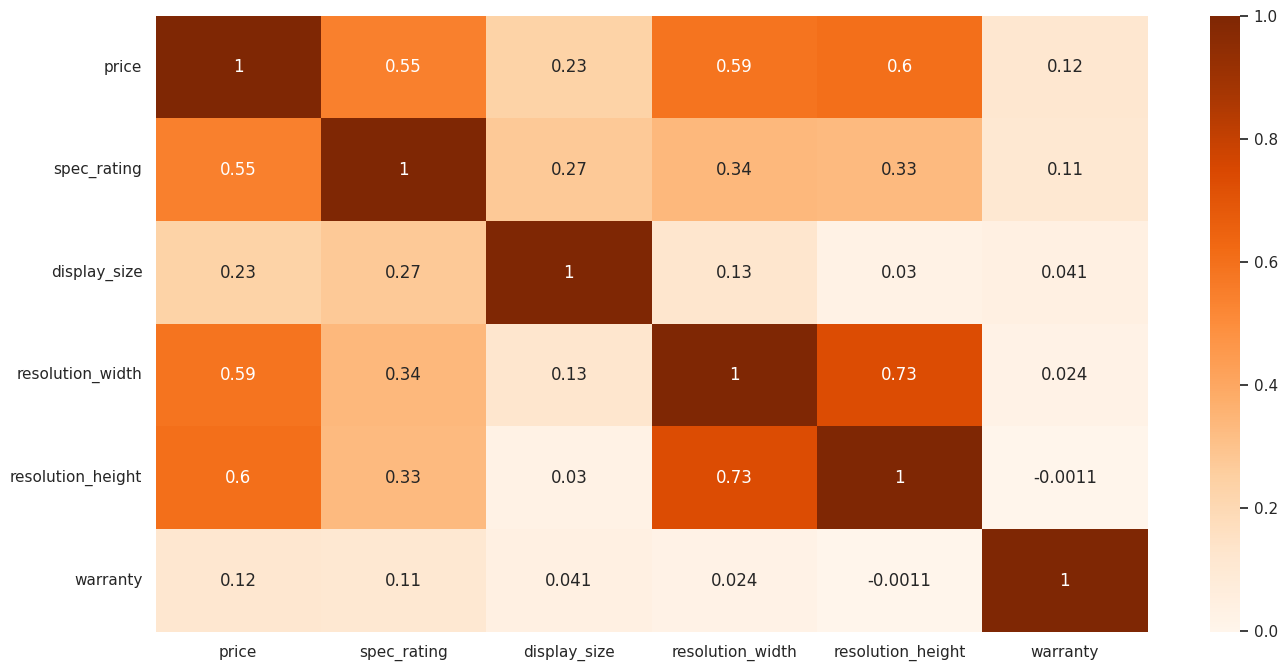

In [12]:
sns.heatmap(
    data.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.


Each cell in the matrix shows the correlation between two variables. The value ranges from -1 to 1, where:

1 indicates a perfect positive correlation: as the value of one variable increases, the value of the other variable also increases.
0 indicates no correlation: there is no relationship between the values of the two variables.
-1 indicates a perfect negative correlation: as the value of one variable increases, the value of the other variable decreases.
The closer the value is to 1 or -1, the stronger the correlation. The color of the cell also indicates the strength of the correlation, with red representing positive correlations and blue representing negative correlations.

Here are some specific observations about the matrix in the image:

The price and resolution_width have a strong positive correlation (0.73). This means that as the resolution width of a product increases, the price also tends to increase.
The price and warranty have a weak negative correlation (-0.0011). This means that there is almost no relationship between the price of a product and its warranty length.
The spec_rating and display size have a weak positive correlation (0.23). This means that there is a slight tendency for products with higher spec ratings to have larger display sizes.

## **H20 AutoML Execution**

Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time..

In [13]:
df = h2o.H2OFrame(
    data
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [14]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [15]:
#Display all columns in X
X=df.columns
print(X)

['brand', 'name', 'price', 'spec_rating', 'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU', 'display_size', 'resolution_width', 'resolution_height', 'OS', 'warranty']


In [16]:
#Seperate Dependent variable from Independent variable
y_numeric ='price'
X.remove(y_numeric)
print(X)

['brand', 'name', 'spec_rating', 'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU', 'display_size', 'resolution_width', 'resolution_height', 'OS', 'warranty']


In [53]:
# Set up AutoML
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")

In [54]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


**Metrics for Regression Tasks:**

MSE (Mean Squared Error): Measures the average squared difference between predicted and actual values. Lower is better.

RMSE (Root Mean Squared Error): Square root of MSE. Easier to interpret in the same units as the target variable. Lower is better.

MAE (Mean Absolute Error): Measures the average absolute difference between predicted and actual values. Less sensitive to outliers than MSE/RMSE. Lower is better.

RMSLE (Root Mean Squared Logarithmic Error): Used for skewed or log-transformed data. Lower is better, but interpretation isn't as straightforward as other metrics.

R^2 (Coefficient of Determination): Measures the proportion of variance in the target variable explained by the model. Ranges from 0 (no explanation) to 1 (perfect explanation).

**Metrics reported on both training and cross-validation data:**

Training data metrics: Reflect how well the model fits the training data, but can be prone to overfitting.

Cross-validation data metrics: Reflect how well the model generalizes to unseen data and are more reliable indicators of real-world performance.

**Interpreting the values in this context:**

The model achieves a high R^2 value on training data, suggesting it fits the data well. However, the lower R^2 on cross-validation data indicates potential overfitting.

RMSE and MAE values are moderate, suggesting some level of prediction error. It's crucial to compare these values to the acceptable error range for your specific problem.

In [26]:
print(aml.leaderboard)# Leaderboard showing the performance of different models on the dataset.

model_id                                                    rmse          mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_210254  24660.4  6.08136e+08  13135.9  0.215686               6.08136e+08
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_210254  24944.2  6.22212e+08  12808.6  0.216151               6.22212e+08
StackedEnsemble_AllModels_2_AutoML_1_20240219_210254     25601.6  6.5544e+08   12942.6  0.217043               6.5544e+08
XGBoost_grid_1_AutoML_1_20240219_210254_model_10         25655.4  6.58202e+08  14001.3  0.230685               6.58202e+08
StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_210254  26221.3  6.87556e+08  13404.8  0.21749                6.87556e+08
StackedEnsemble_AllModels_1_AutoML_1_20240219_210254     26445.1  6.99344e+08  13494.2  0.219802               6.99344e+08
XGBoost_grid_1_AutoML_1_20240219_210254_model_13         26984.7  7.28176e+08  13865.5  0.211906               7.28176e+08
StackedEnsemble_A

The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the best performing model is

StackedEnsemble_AllModels_2_AutoML_1_20240219_172418 with RSME score of 27400.8

The second-best model is

StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_172418 with RSME score of 27690.9

The models are then listed in descending order based on their rmse scores.

In [29]:
best_model = aml.leader
best_model.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 1425589043.3966792
RMSE: 37756.97344063318
MAE: 16277.316420635061
RMSLE: 0.28229301848624816
Mean Residual Deviance: 1425589043.3966792
R^2: 0.6697736820851365
Null degrees of freedom: 175
Residual degrees of freedom: 170
Null deviance: 760184273183.5314
Residual deviance: 250903671637.81552
AIC: 4223.168127199594

In [33]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_210254': 0,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_210254': 1,
 'StackedEnsemble_AllModels_2_AutoML_1_20240219_210254': 2,
 'XGBoost_grid_1_AutoML_1_20240219_210254_model_10': 3,
 'GLM_1_AutoML_1_20240219_210254': 55}

In [34]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

3


In [35]:
best_model.algo

'xgboost'

# Identifying Important Variable

In [36]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

<ipython-input-36-a0f01d27643e>:8: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


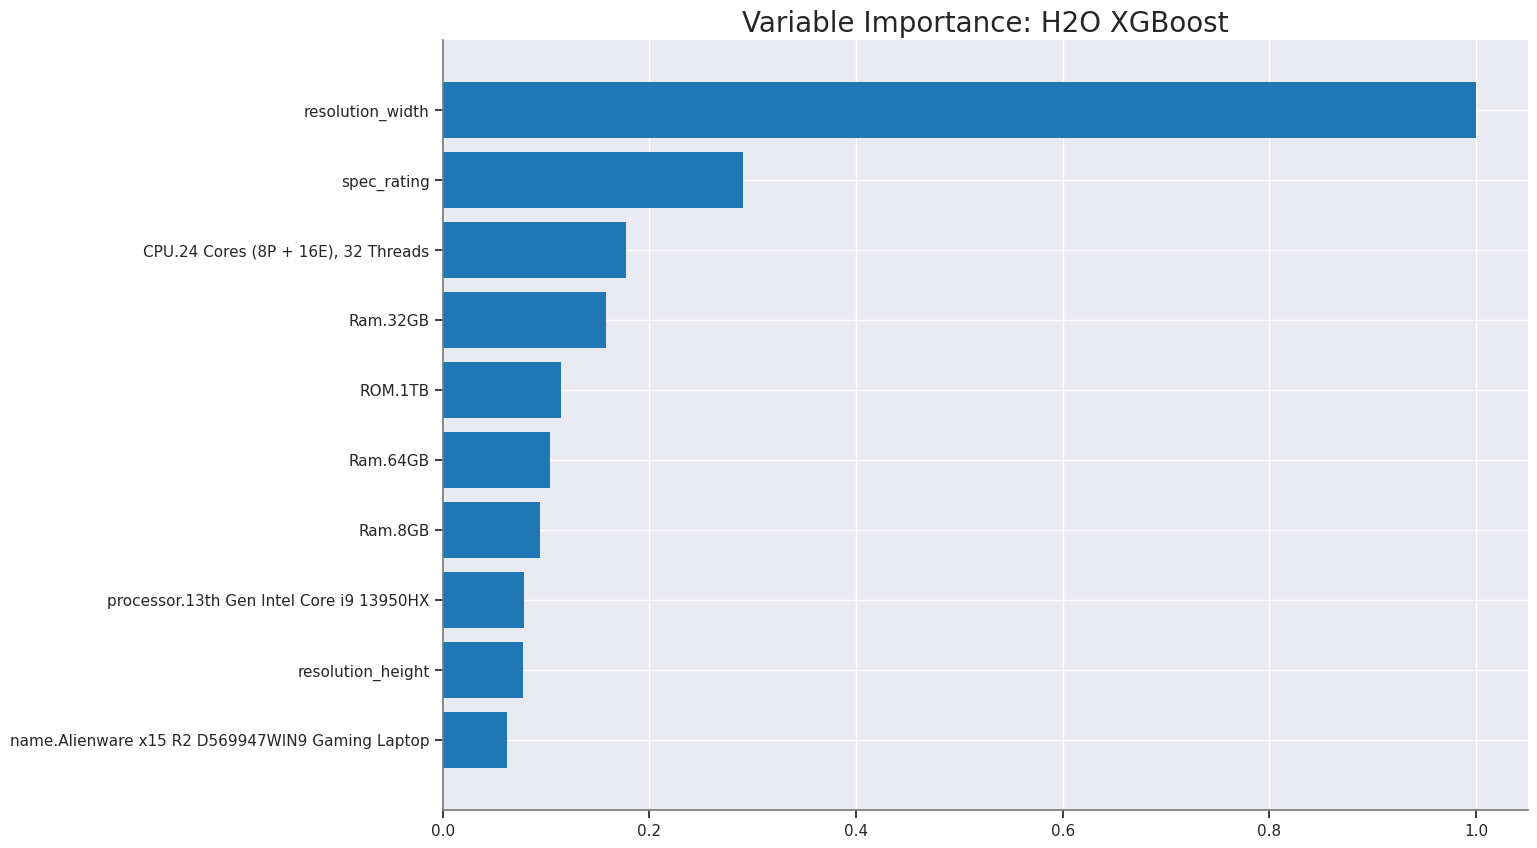

<Figure size 1600x800 with 0 Axes>

In [37]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

From the above graph we can deduce that the resolution width is the most important variable with impotance of 1.0

**In the multivariate models are predictor variables independent of all the other predictor variables?**

From the corelation plot we can assure that all the predictor variable are independent of each other

 **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

 The most significant one can be given by the variable importance plot and that is resolution_width.

 **Does the model make sense?**

 Yes the model makes sense. The qustion is a regression question and models in AutoML can deal with it.


<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-38-0cab54a0793b>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


55
glm


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


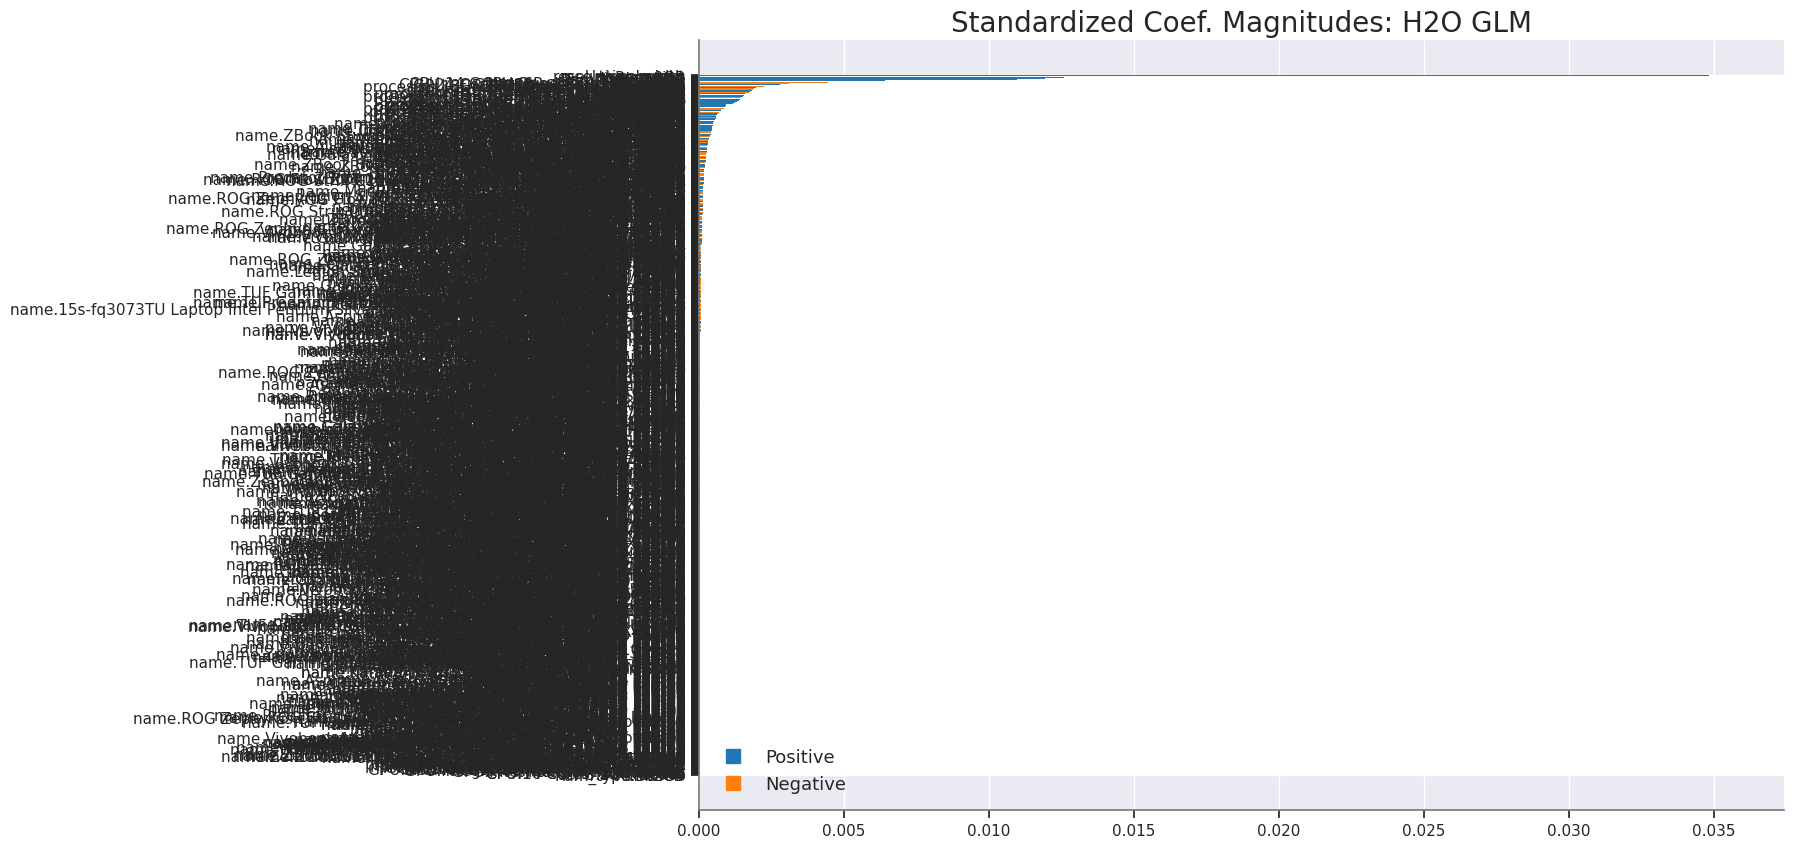

In [38]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

Standardized coefficient magnitudes (sometimes referred to as standardized coefficients or beta coefficients) are a measure of the importance of each input variable in a predictive model, after standardizing all variables to have a mean of zero and a standard deviation of one. The values of standardized coefficient magnitudes can range from negative infinity to positive infinity, but they are typically expressed as a percentage.

The values on standardized coefficient magnitudes represent the relative importance of each input variable in the model, after taking into account the scale of the variable. A higher magnitude value indicates that the variable has a stronger impact on the outcome variable, while a lower value indicates a weaker impact.

# Identifying Predictor Sgnificance

In [21]:
import statsmodels.api as sm

model = sm.OLS(data['price'], data[['spec_rating', 'display_size', 'resolution_width', 'resolution_height', 'warranty']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.778
Model:                            OLS   Adj. R-squared (uncentered):              0.777
Method:                 Least Squares   F-statistic:                              623.6
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                   1.53e-287
Time:                        22:27:15   Log-Likelihood:                         -10879.
No. Observations:                 893   AIC:                                  2.177e+04
Df Residuals:                     888   BIC:                                  2.179e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
spec_rating        1672.9347    291.794      5.733      0.000    1100.249    2245.620
display_size      -1.182e+04   1234.729     -9.573      0.000   -1.42e+04   -9396.879
resolution_width     32.0482      5.566      5.757      0.000      21.123      42.973
resolution_height    59.3747      7.247      8.193      0.000      45.152      73.597
warranty           6384.2728   4866.433      1.312      0.190   -3166.778    1.59e+04
==============================================================================
Omnibus:                      464.834   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4111.207
Skew:                           2.205   Prob(JB):                         0.00
Kurtosis:                      12.541   Cond. No.                     7.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Diagnostics:**

Omnibus, Jarque-Bera, Skew, and Kurtosis: These tests assess the normality of the residuals (error terms). High values may indicate non-normality, which could affect the reliability of the results.

Durbin-Watson: Test for autocorrelation in the residuals. Value close to 2 indicates no autocorrelation. In this case, 1.799 suggests mild positive autocorrelation.

Condition Number: High value (7.44e+03) indicates potential multicollinearity among independent variables. This could affect the accuracy and stability of the model.

**Overall:**

The model seems to fit the data well (high R-squared), but some diagnostics suggest potential issues with normality and multicollinearity.
The results provide insights into how different factors like specifications, size, resolution, and warranty affect product price.

**Regarding Relation Ship Significance:**

Conventionally, a p-value less than 0.05 is considered statistically significant.

In this case:

spec_rating, display_size, resolution_width, resolution_height, and warranty all have p-values < 0.05, indicating statistically significant relationships with price.
We can be confident that these predictors are not just random noise and likely have a genuine impact on price.


# VIF(multicollinearity)

In [23]:
dff = data[['spec_rating', 'display_size', 'resolution_width', 'resolution_height', 'warranty']]

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data[['spec_rating', 'display_size', 'resolution_width', 'resolution_height', 'warranty']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

             feature         VIF
0        spec_rating  163.787353
1       display_size  139.926917
2   resolution_width   53.205530
3  resolution_height   33.177498
4           warranty   11.963601


Based on the VIF (Variance Inflation Factor) values that are present, it appears we have multicollinearity in our data, particularly between some of the feature variables.

Here's what the VIF values tell us:

VIF > 10: Indicates potential multicollinearity.
VIF > 100: Indicates strong multicollinearity, requiring action.

In our case:

spec_rating and display_size have VIF values > 100, suggesting strong multicollinearity.
resolution_width and resolution_height have VIF values > 10, suggesting moderate multicollinearity.
warranty has a VIF < 10, indicating no significant multicollinearity.

# Regularization
In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

*   Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization ability.
*   Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.
*   Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By setting some coefficients to zero, Lasso can effectively remove irrelevant variables from the model, which can lead to a simpler and more interpretable model.
*   The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.






In [39]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

price_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
price_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
price_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
price_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

This code is creating two generalized linear regression models using the H2O machine learning platform with different regularization methods: Ridge and Lasso.


*   The first model, "wine_glm_regularization_ridge," is using Ridge regularization. The "family" argument is set to "gaussian," which means that the response variable is continuous and the model is using a normal (Gaussian) error distribution. The "alpha" argument is set to 0, which means that the model is using Ridge regularization. The "nfolds" argument is set to 5, which means that the model is using 5-fold cross-validation to evaluate the performance of the model.
* The second model, "wine_glm_regularization_lasso," is using Lasso regularization. The "family" and "nfolds" arguments are the same as in the Ridge model, but the "alpha" argument is set to 1, which means that the model is using Lasso regularization.





This code creates a generalized linear regression model using H2O with the option of performing lambda search for L1 and L2 regularization.

In [49]:
X=df.columns
y_numeric ='price'
X.remove(y_numeric)


In [48]:
price_glm_regularization_ridge.train(x=X, y=y_numeric, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 3650.7 ),1239,1058,1,py_2_sid_a492
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,39797.008,2335.4424,39203.332,38350.246,40270.11,43573.957,37587.387
mean_residual_deviance,3597055490.0000000,768803330.0000000,3829078530.0000000,3272254720.0000000,4005524990.0000000,4436261900.0000000,2442157570.0000000
mse,3597055490.0000000,768803330.0000000,3829078530.0000000,3272254720.0000000,4005524990.0000000,4436261900.0000000,2442157570.0000000
null_deviance,511614845000.0000000,106025550000.0000000,482752004000.0000000,422379291000.0000000,601200660000.0000000,643636850000.0000000,408105452000.0000000
r2,-0.0117797,0.0125832,-0.0022194,-0.0063773,-0.0015076,-0.0310621,-0.0177323
residual_deviance,511302369000.0000000,105967739000.0000000,482463875000.0000000,422120849000.0000000,600828740000.0000000,643257990000.0000000,407840326000.0000000
rmse,59679.17,6656.969,61879.547,57203.625,63289.215,66605.27,49418.19
rmsle,0.6323186,0.0174520,0.6534531,0.6480312,0.6167881,0.626968,0.6163526


In [51]:
price_glm_regularization_lasso.train(x=X, y=y_numeric, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 3650.7 ),1239,8,1,py_2_sid_a492
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,25683.969,2705.412,24021.664,29555.23,23033.693,27388.838,24420.422
mean_residual_deviance,1652012670.0000000,415052928.0000000,1627250690.0000000,2216025090.0000000,1160893570.0000000,1880925570.0000000,1374968450.0000000
mse,1652012670.0000000,415052928.0000000,1627250690.0000000,2216025090.0000000,1160893570.0000000,1880925570.0000000,1374968450.0000000
null_deviance,510834442000.0000000,79192826000.0000000,474104168000.0000000,630256040000.0000000,420319330000.0000000,539764261000.0000000,489728410000.0000000
r2,0.5387791,0.0415430,0.4814452,0.5293908,0.5828124,0.5243202,0.5759272
residual_deviance,234155459000.0000000,45427016000.0000000,239205843000.0000000,294731350000.0000000,175294939000.0000000,253924950000.0000000,207620227000.0000000
rmse,40387.19,5109.71,40339.195,47074.676,34071.89,43369.64,37080.566
rmsle,0.4483711,0.0215034,0.4576281,0.4481308,0.4280898,0.4793909,0.4286158


**Does regularization help?**

The regularization helps as we can see from both model that the mean squraed error has significantly improved from before.

The Ridge regularization method has improved MSE mean more.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_3_AutoML_3_20240220_05225,14829.7,2.19919e+08,8855.22,0.15763,2.19919e+08,405,0.008987,XGBoost
XGBoost_2_AutoML_3_20240220_05225,14857.2,2.20735e+08,8173.21,0.140701,2.20735e+08,335,0.010708,XGBoost
GBM_4_AutoML_3_20240220_05225,18332.3,3.36075e+08,5075.07,0.173296,3.36075e+08,590,0.024566,GBM
XGBoost_1_AutoML_3_20240220_05225,18666.2,3.48426e+08,10633.5,0.155068,3.48426e+08,502,0.014489,XGBoost
GBM_2_AutoML_3_20240220_05225,18714.4,3.50229e+08,5221.97,0.166529,3.50229e+08,589,0.018691,GBM
GBM_3_AutoML_3_20240220_05225,19544.6,3.8199e+08,5717.76,0.177957,3.8199e+08,566,0.023312,GBM
DRF_1_AutoML_3_20240220_05225,20011.1,4.00444e+08,8859.07,0.150374,4.00444e+08,1753,0.033398,DRF
XRT_1_AutoML_3_20240220_05225,20502.5,4.20353e+08,11936,0.225946,4.20353e+08,3395,0.053189,DRF
StackedEnsemble_AllModels_1_AutoML_3_20240220_05225,22950,5.26703e+08,12687.5,0.163755,5.26703e+08,701,0.274669,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_3_20240220_05225,23184.9,5.37542e+08,12805,0.165592,5.37542e+08,1113,0.171743,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

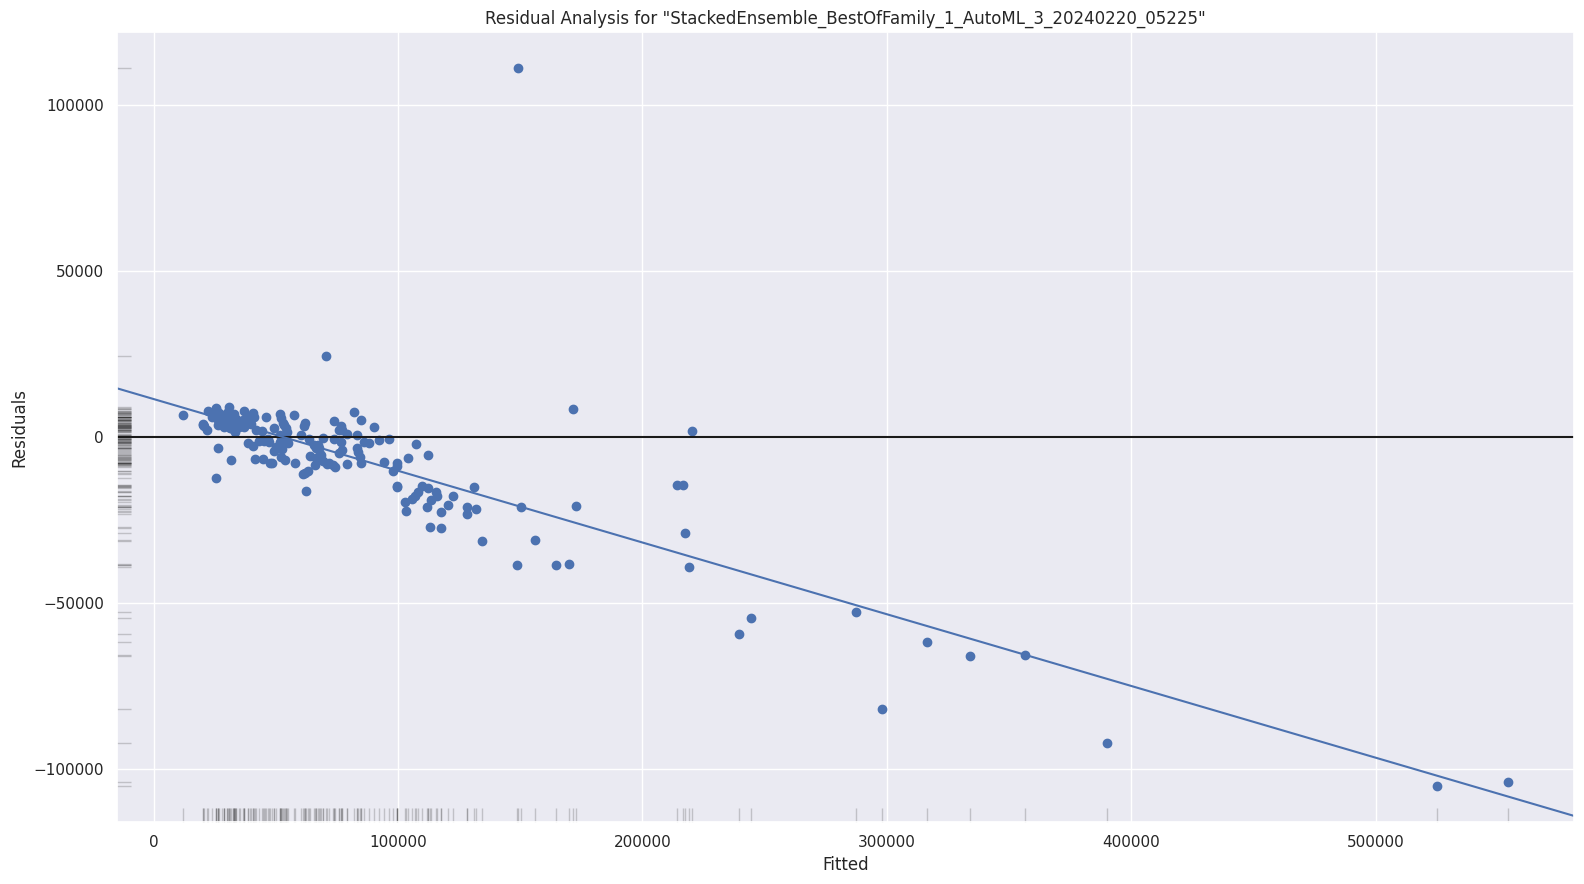

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

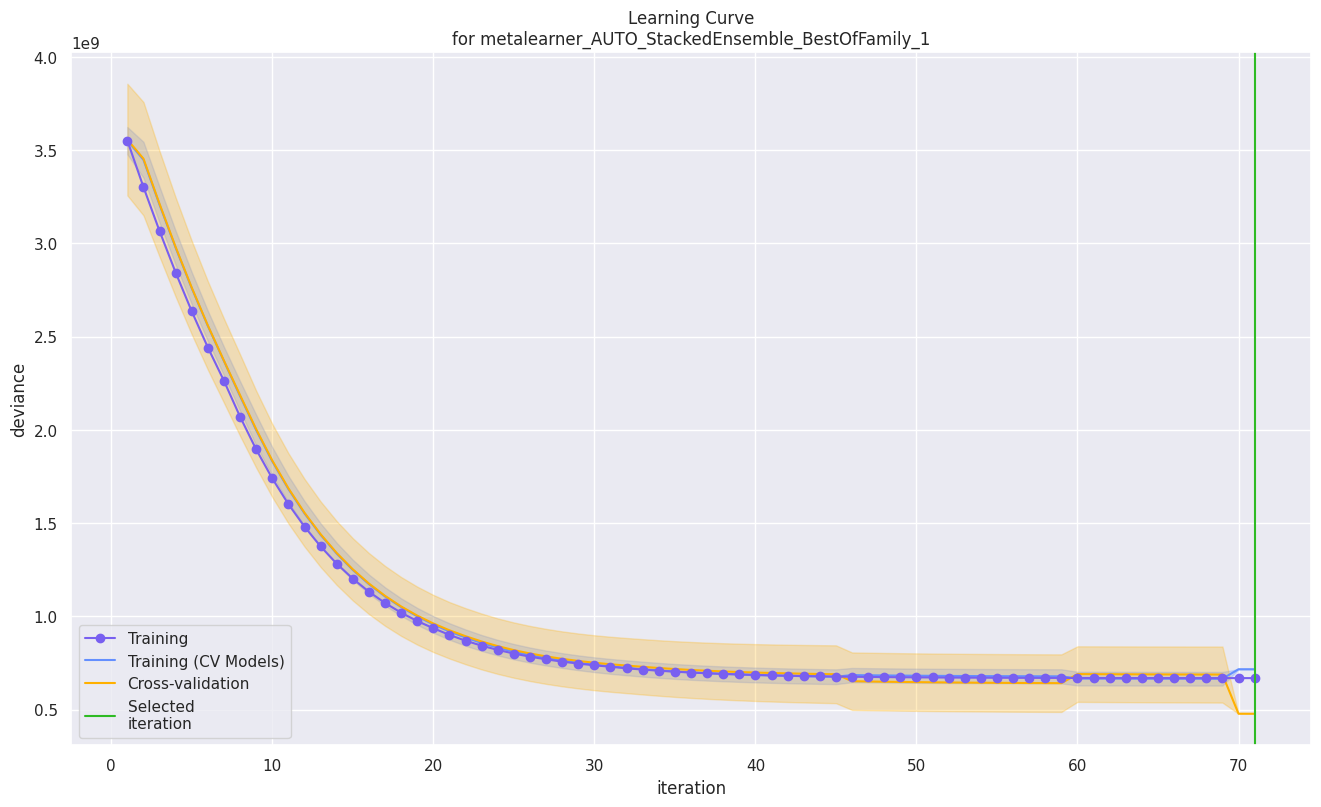

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

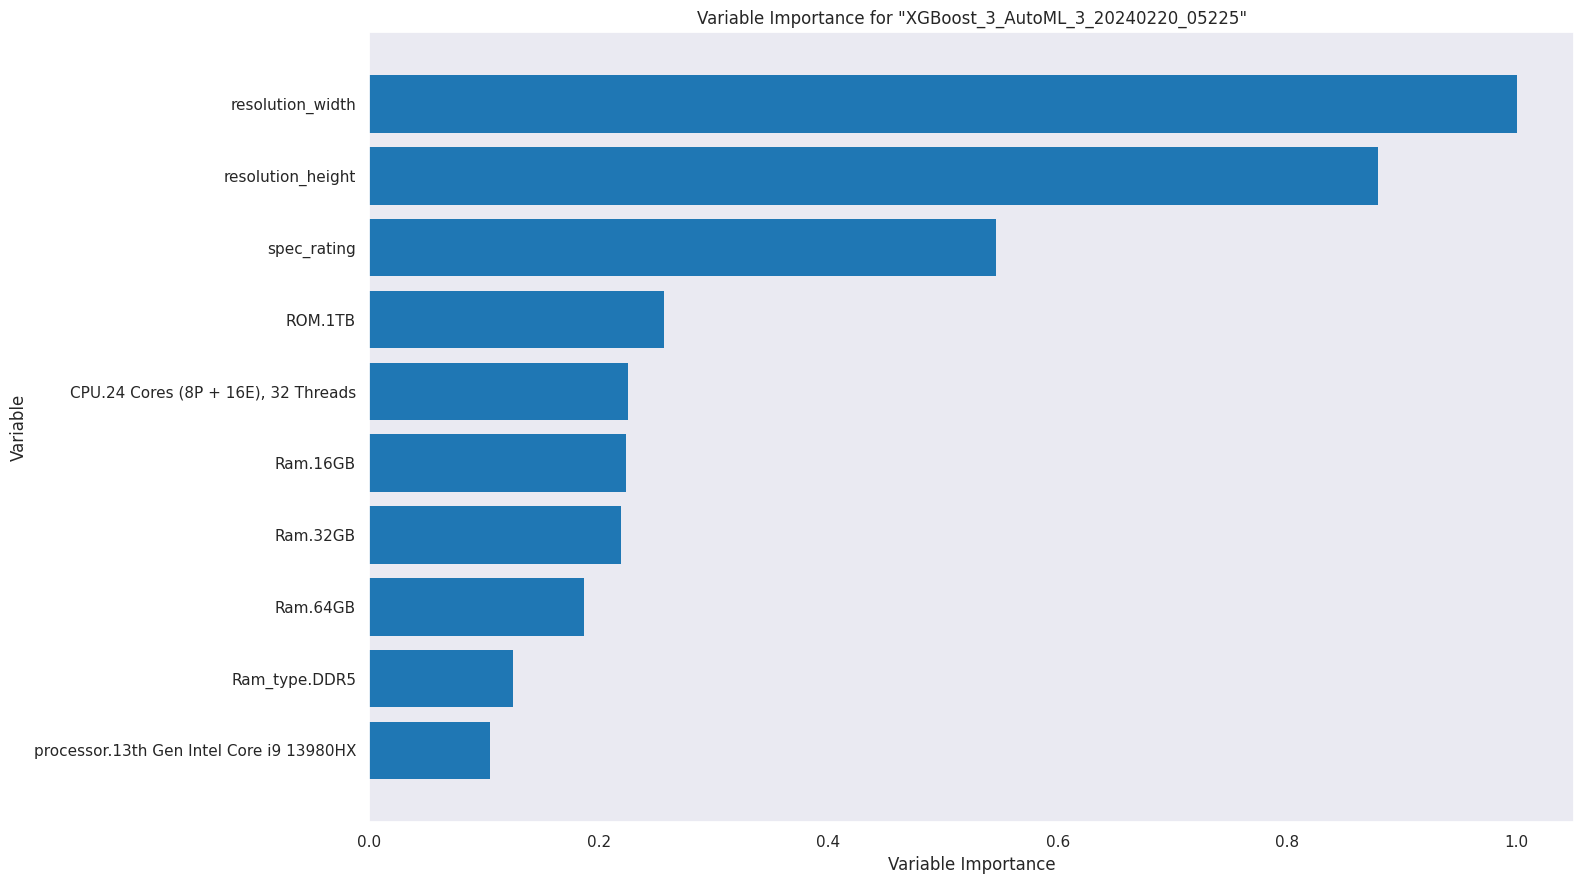

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

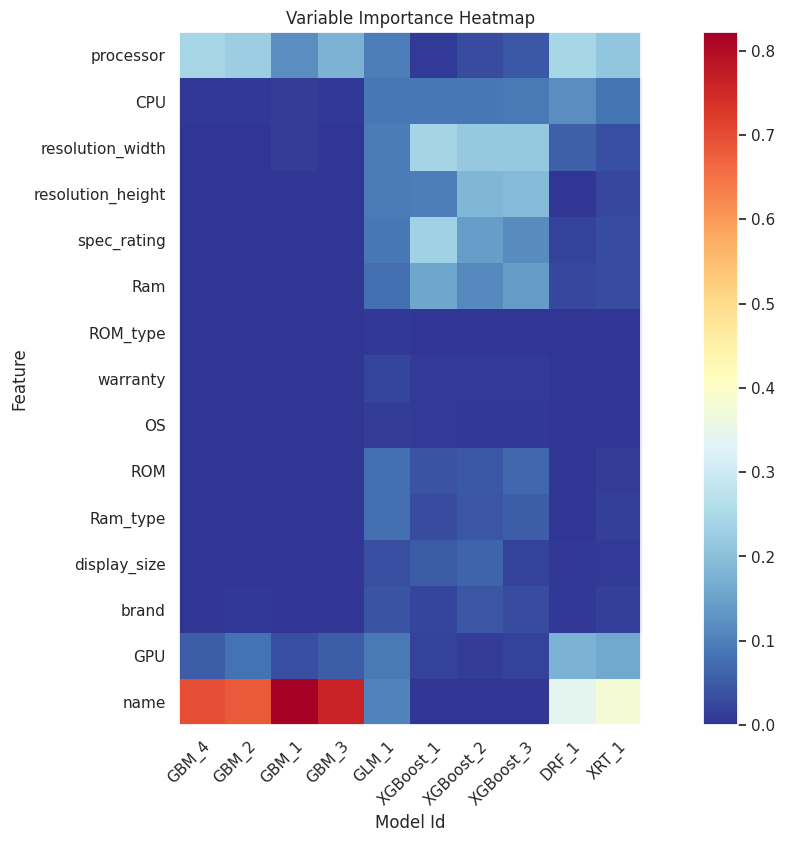

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

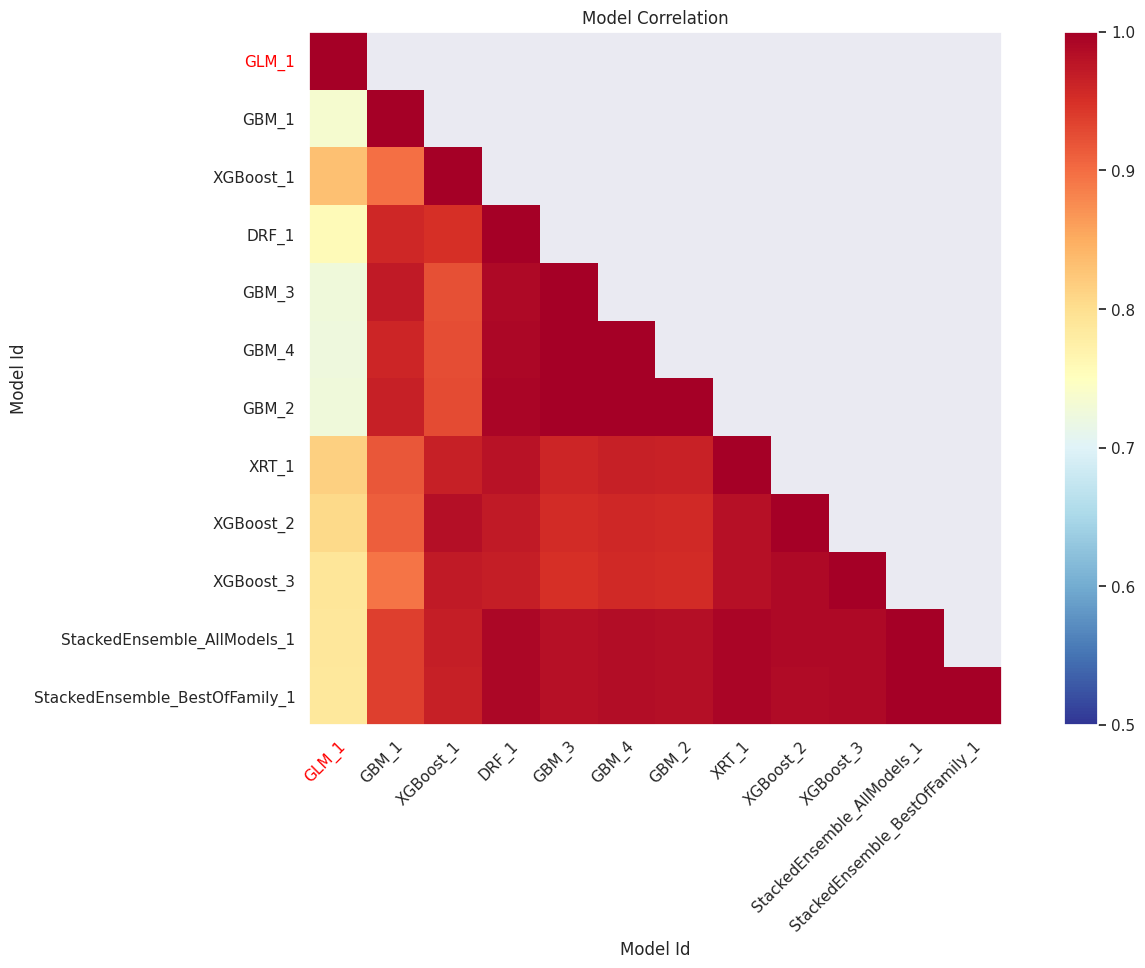

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

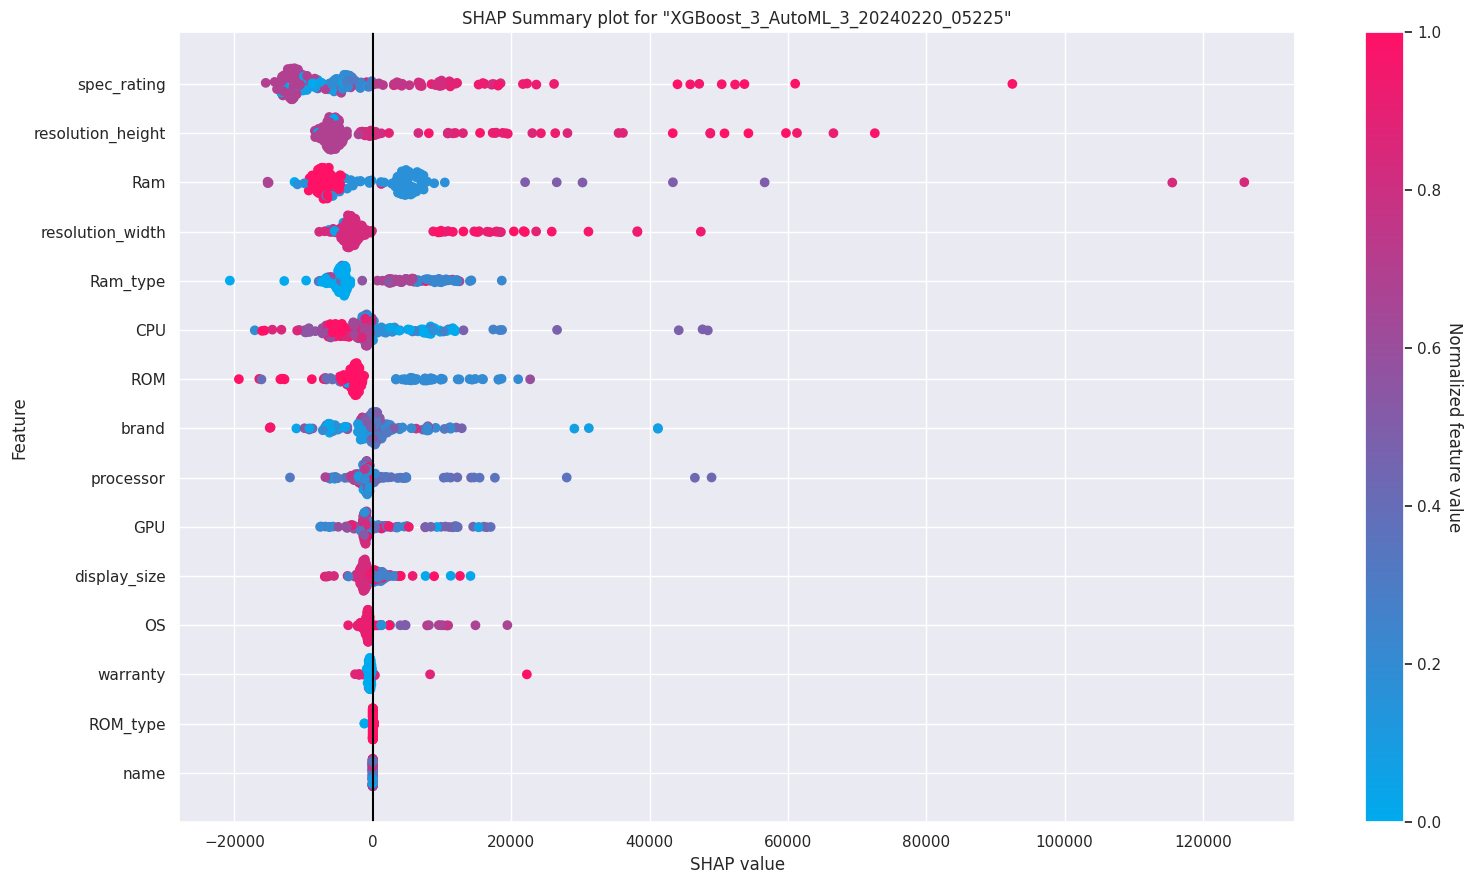

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

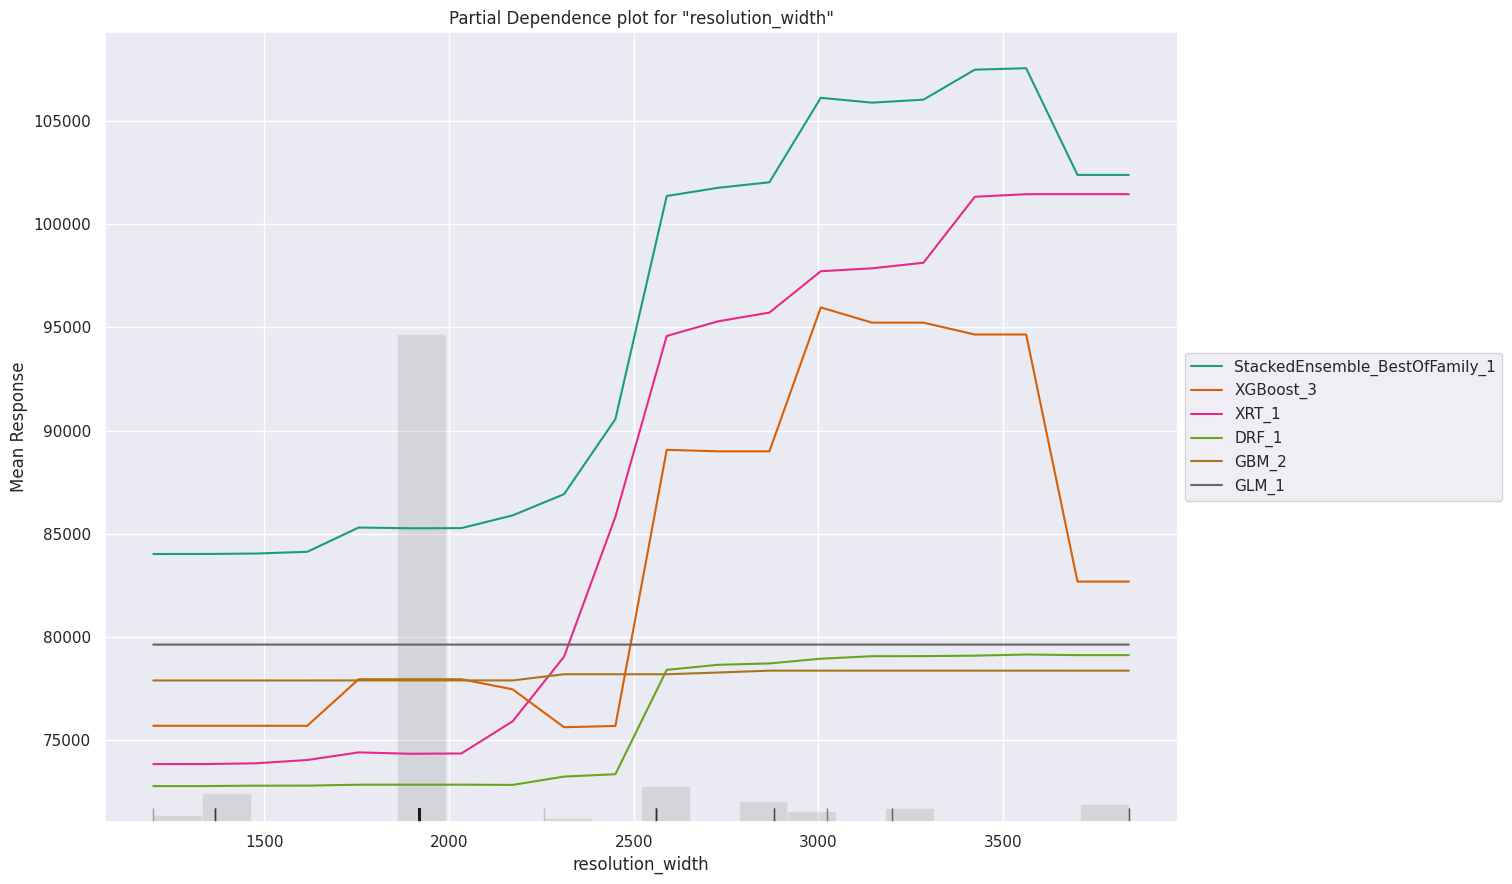

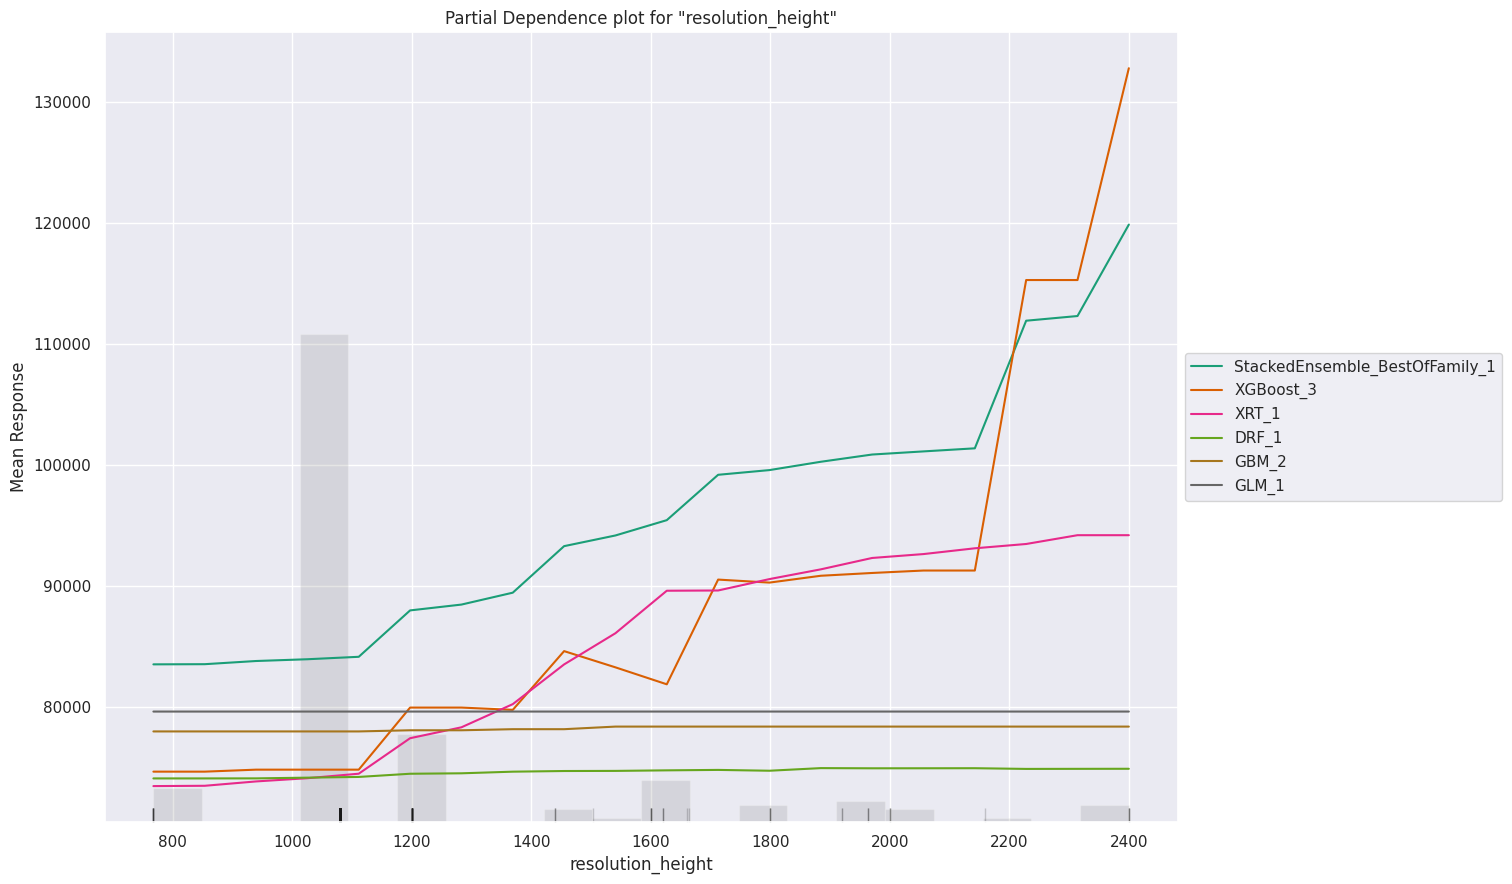

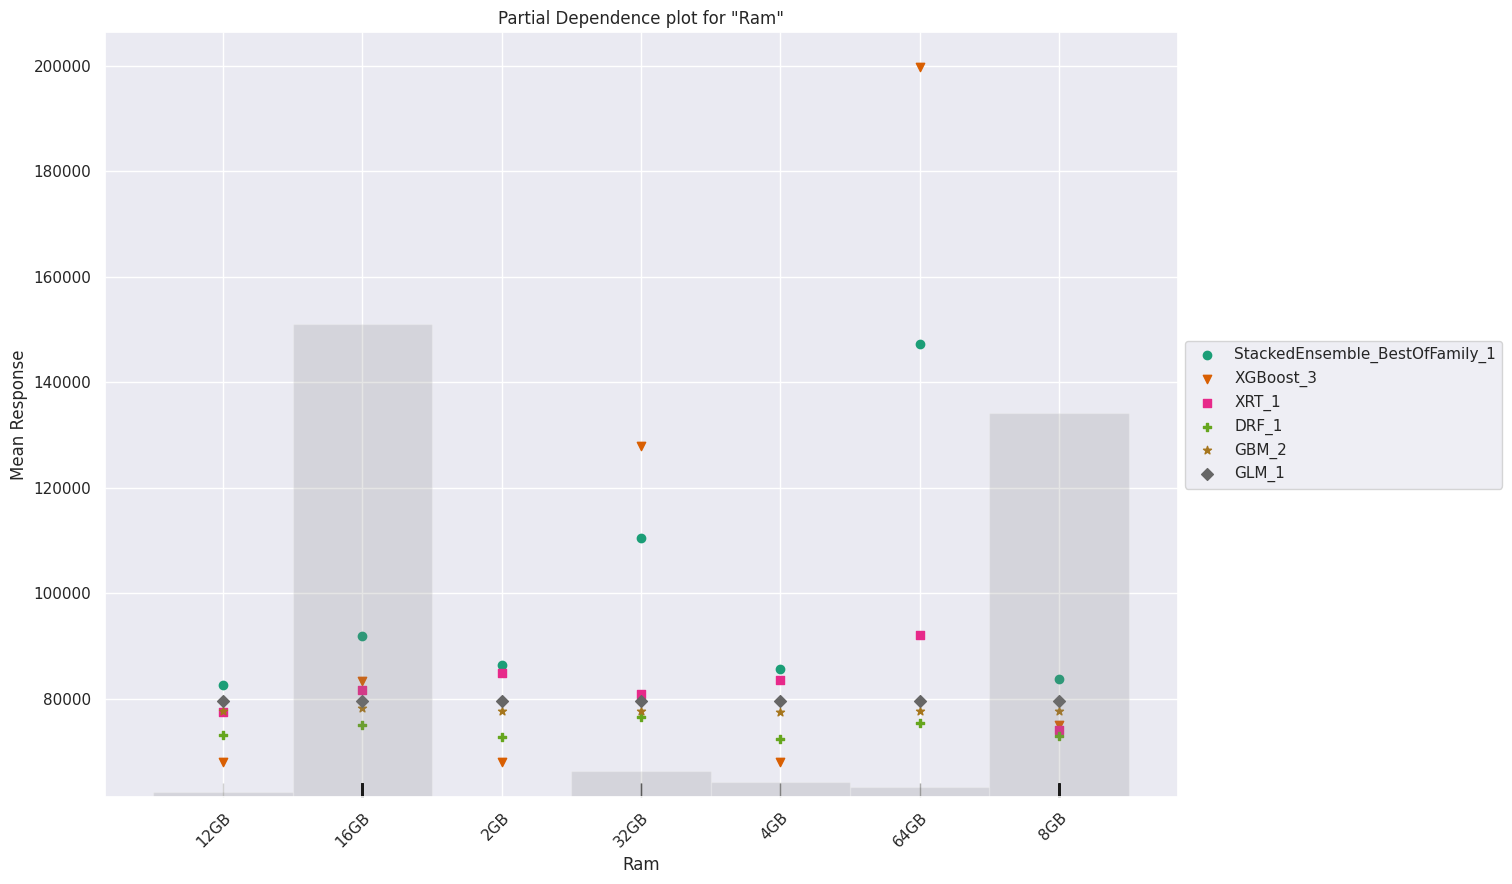

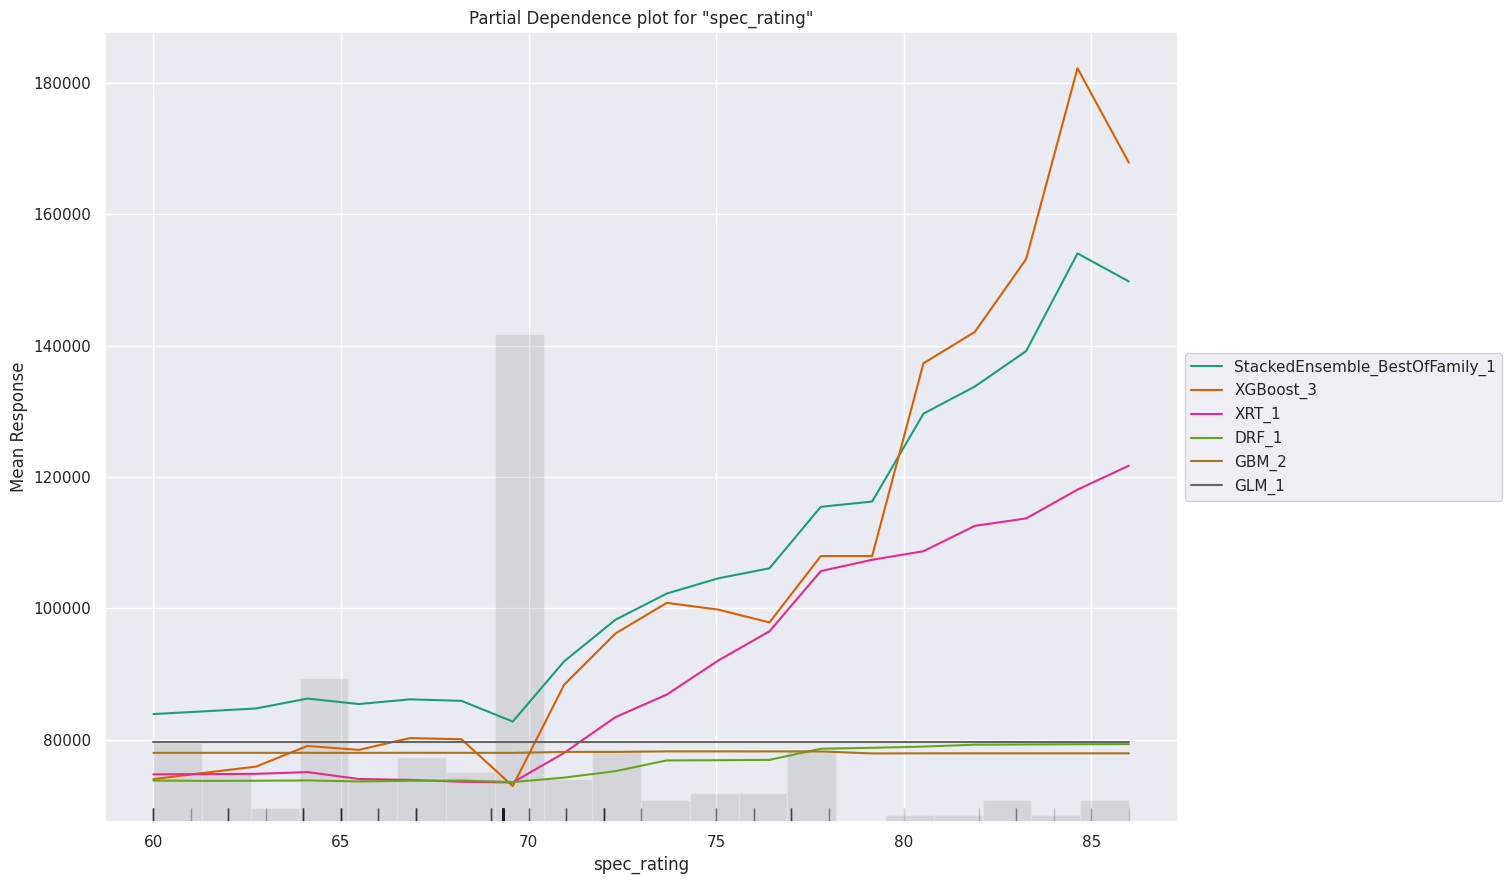

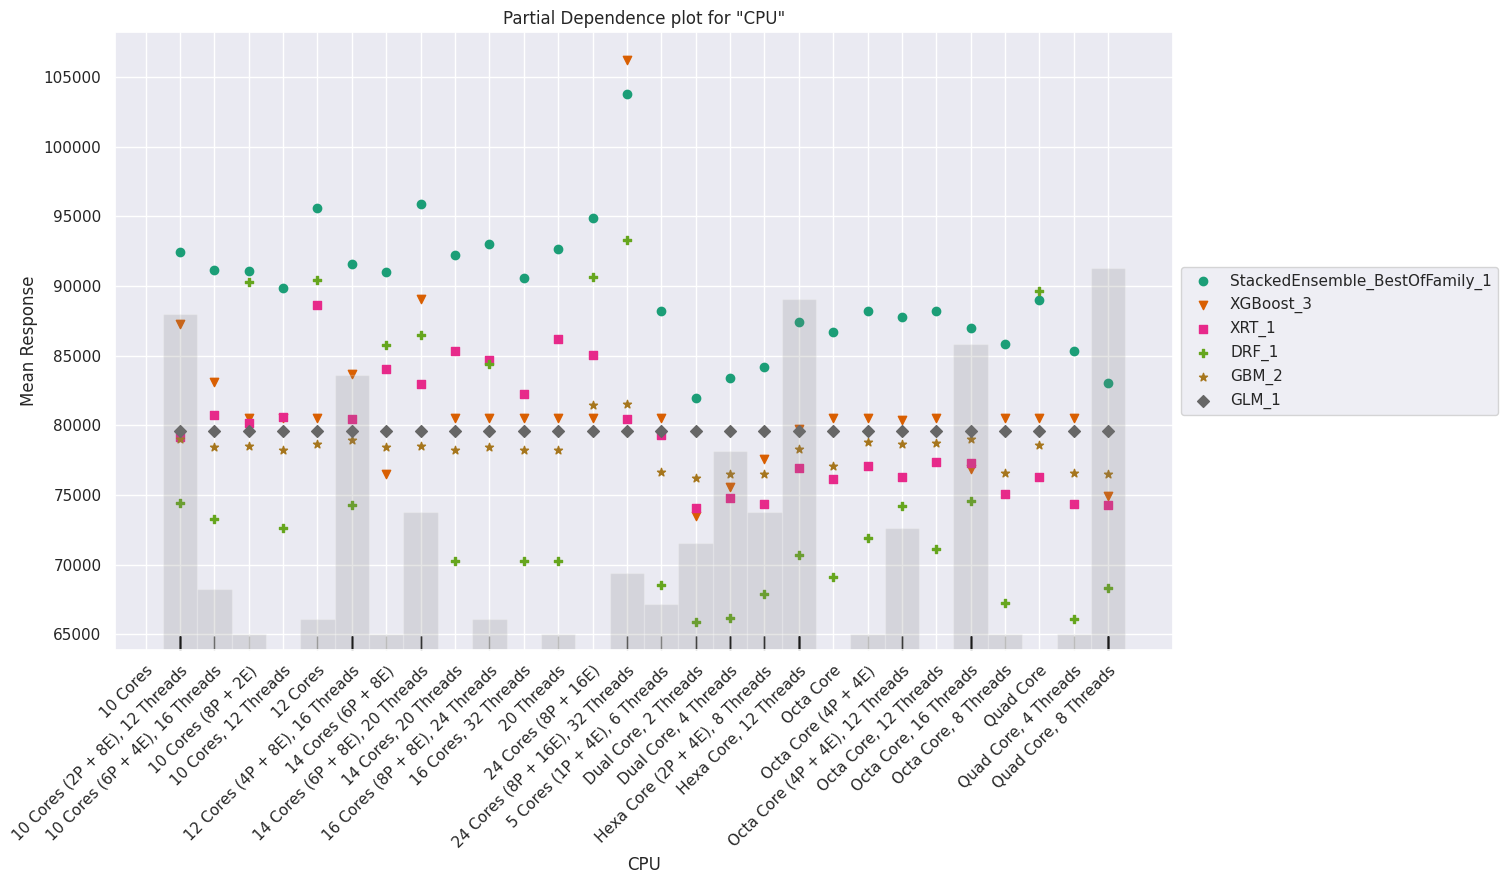

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

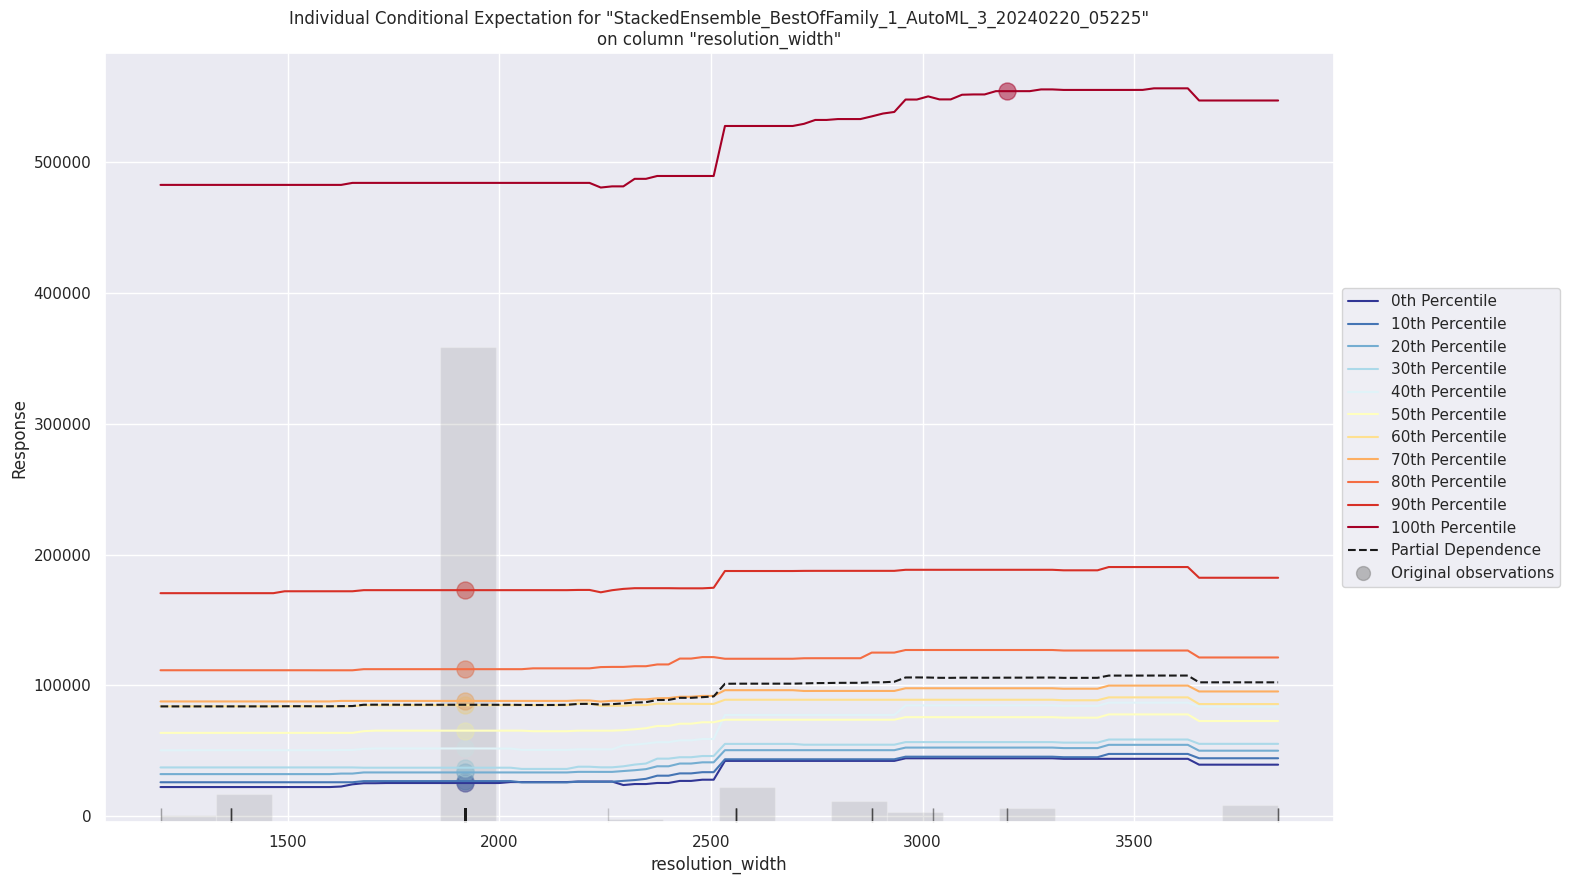

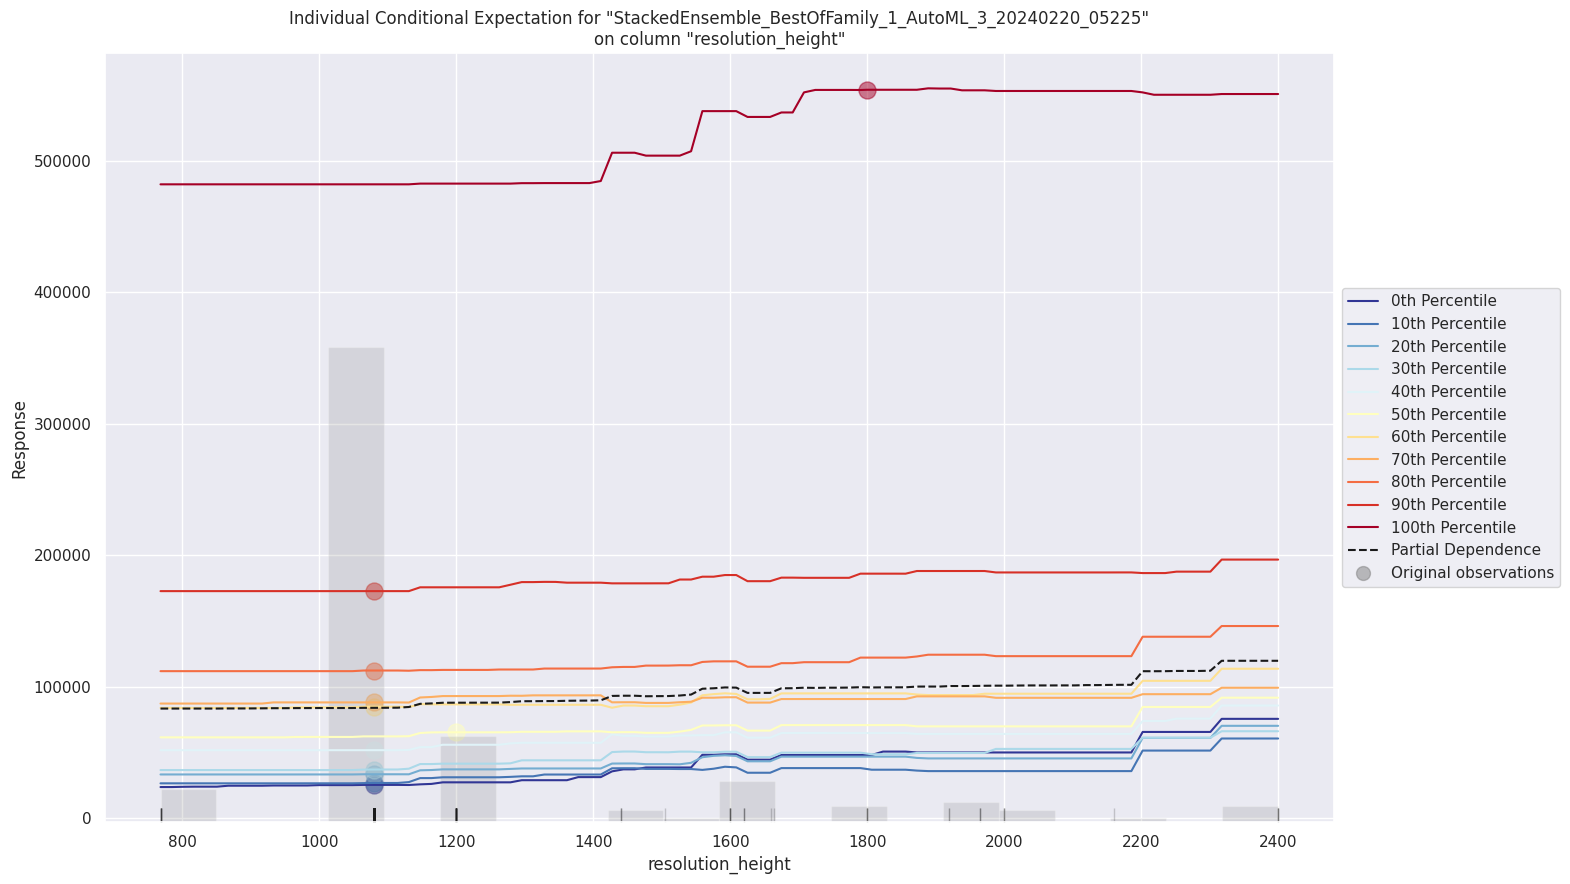

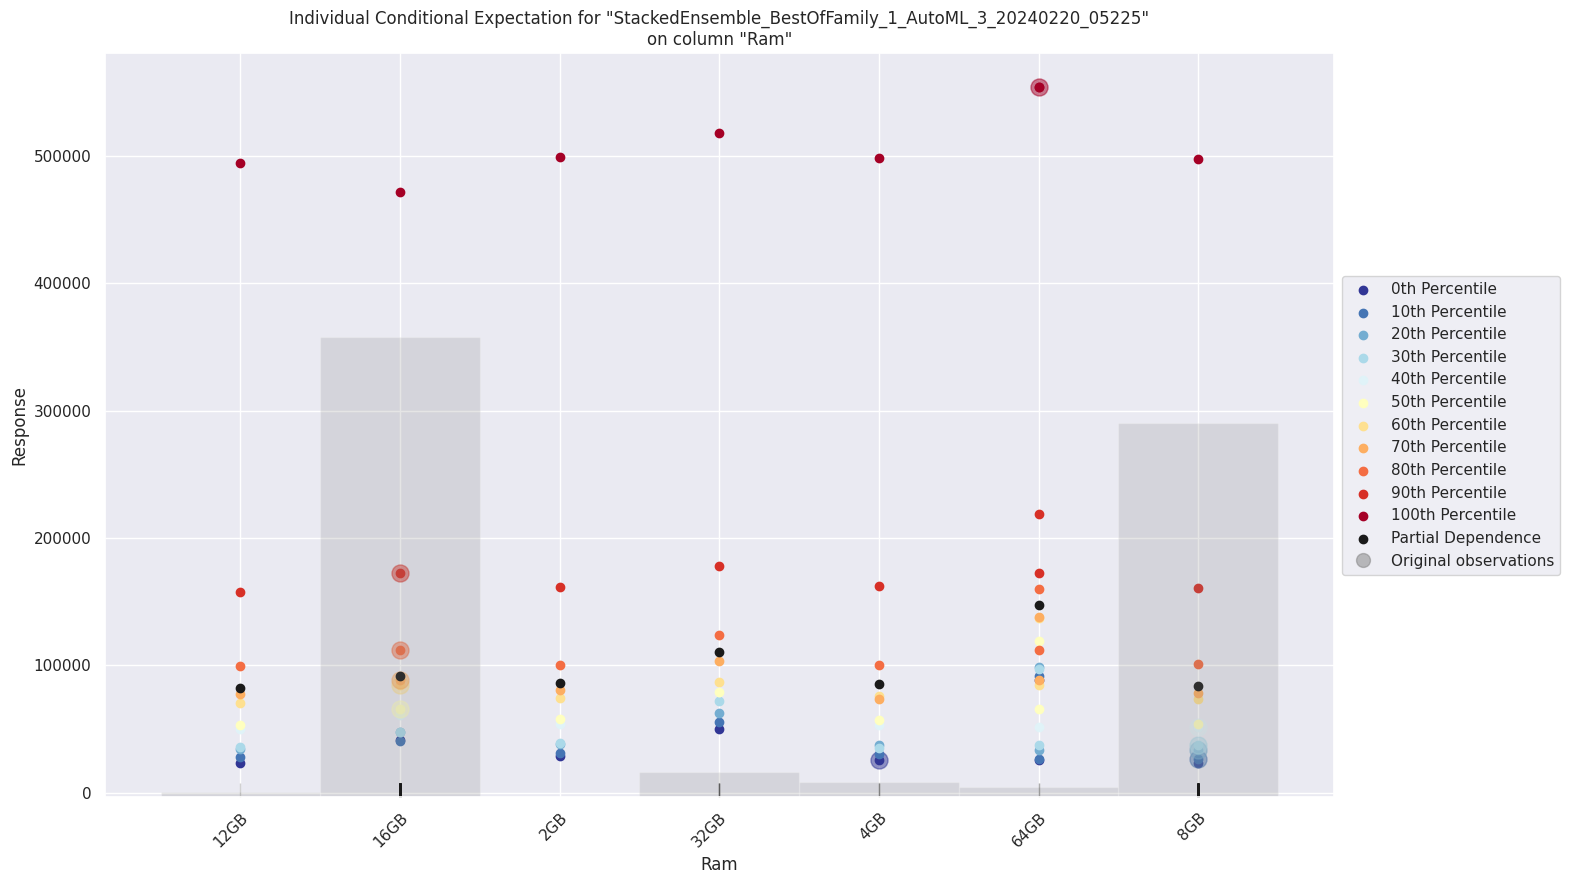

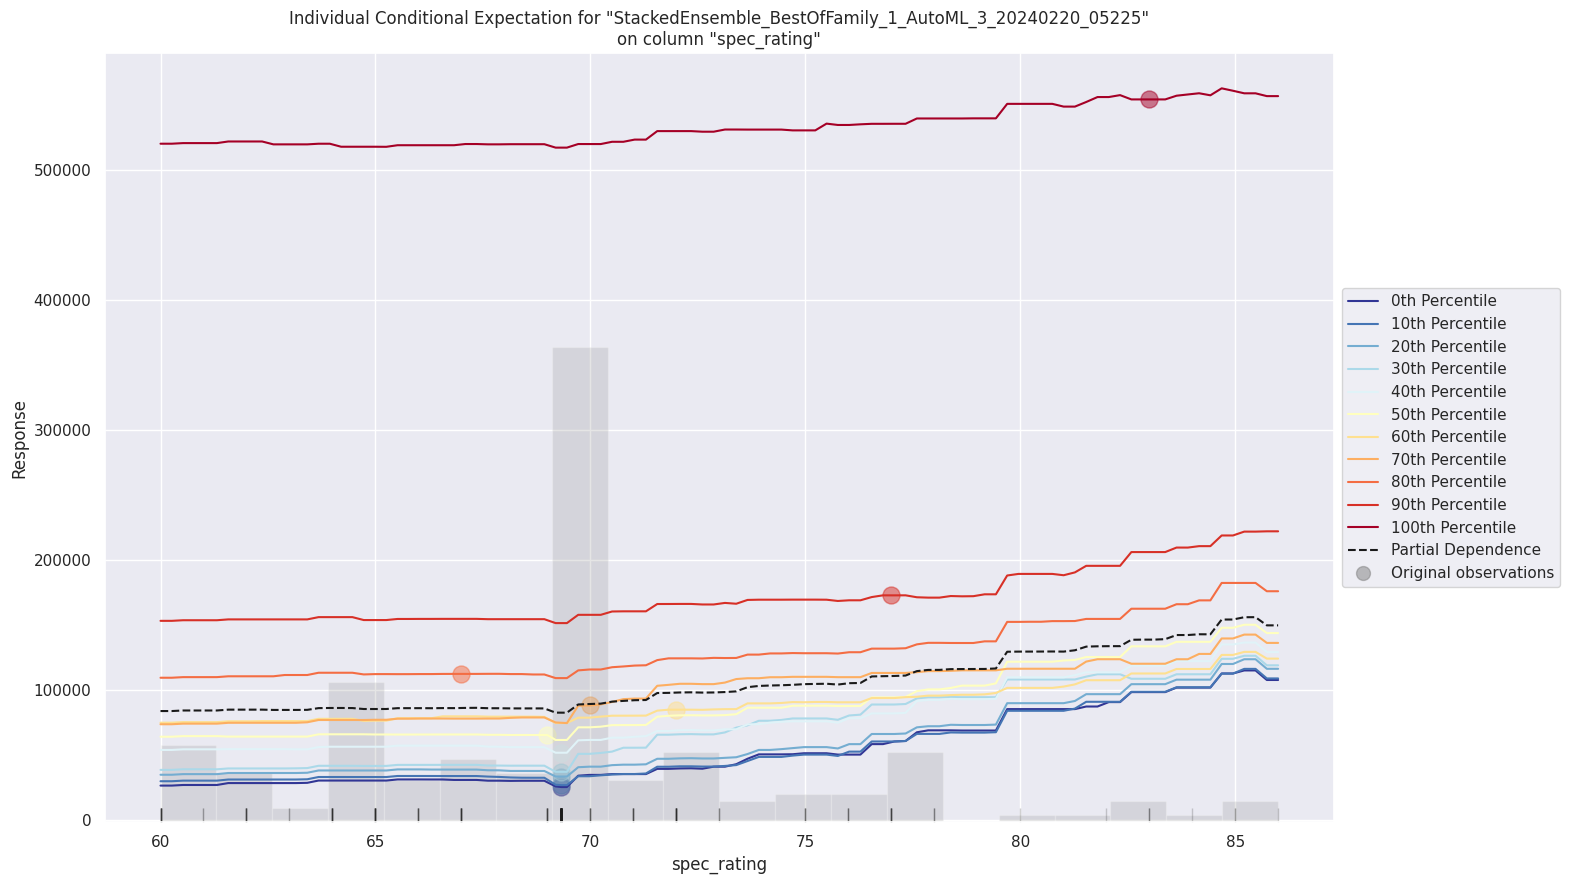

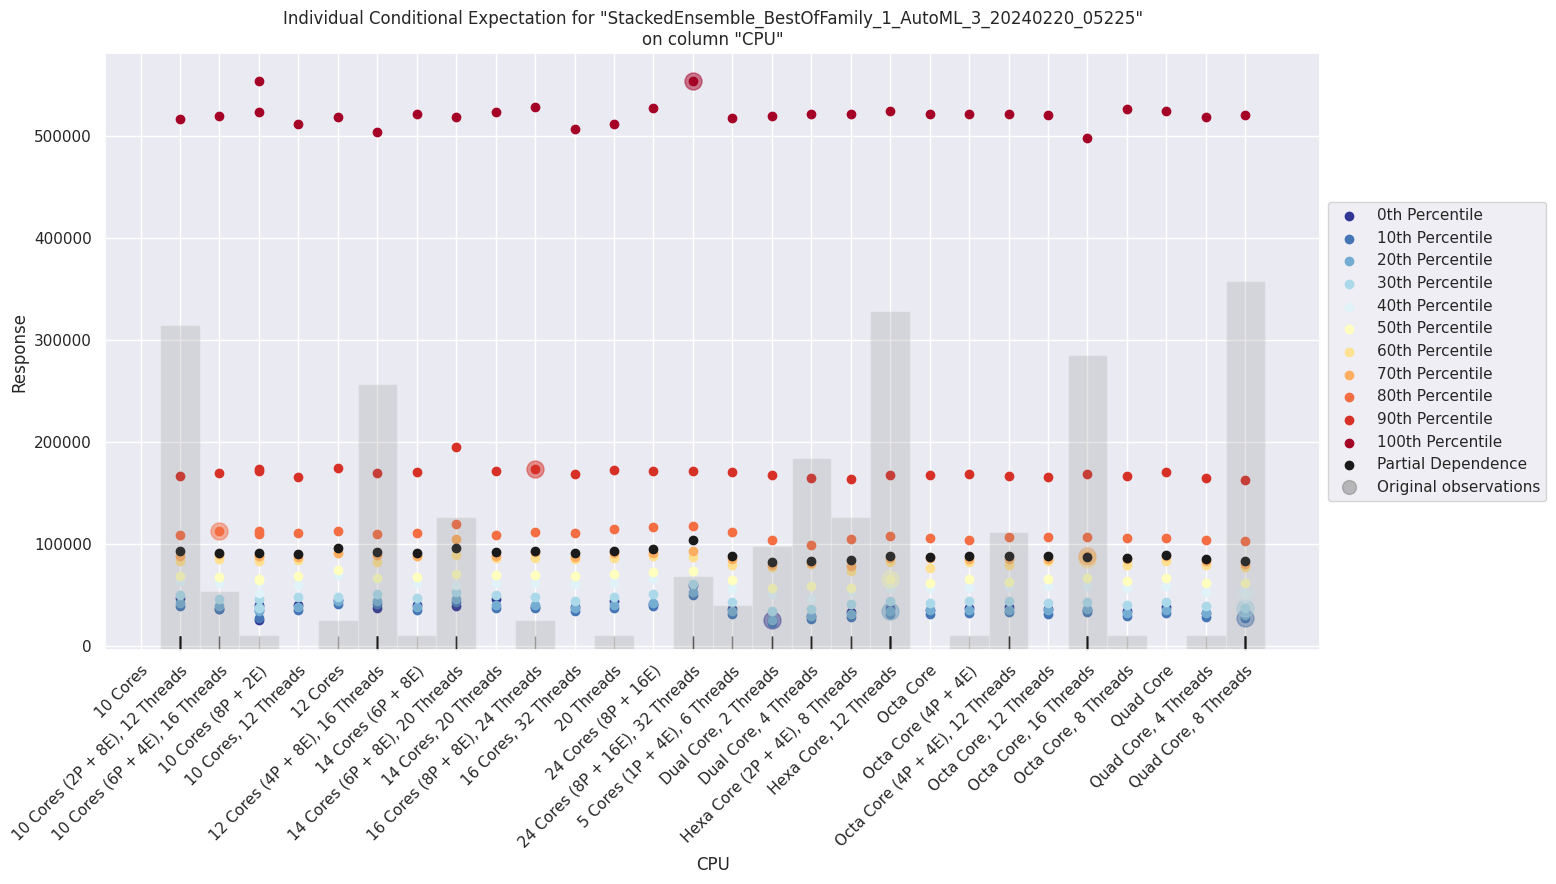

In [73]:
exa = aml.explain(df_test)

In [74]:
import statsmodels.formula.api as smf  # OLS model Library

In [75]:
import h2o

pandas_df = h2o.as_list(df)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [79]:
results = smf.ols(
    "price ~ spec_rating + resolution_height + Ram + resolution_width + Ram_type + CPU + ROM  + processor + GPU + display_size + OS + warranty + ROM_type + name",
    data=pandas_df,
).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     182.8
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           4.35e-49
Time:                        04:44:45   Log-Likelihood:                -7536.5
No. Observations:                 893   AIC:                         1.676e+04
Df Residuals:                      52   BIC:                         2.079e+04
Df Model:                         840                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================================
                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                            2.346e+05   1.24e+05      1.898      0.063   -1.34e+04    4.83e+05
Ram[T.16GB]                                                                          9982.4873   1.66e+04      0.602      0.550   -2.33e+04    4.33e+04
Ram[T.2GB]                                                                           5038.1083   1.01e+04      0.500      0.619   -1.52e+04    2.52e+04
Ram[T.32GB]                                                                          7.207e+04   2.45e+04      2.945      0.005     2.3e+04    1.21e+05
Ram[T.4GB]                                                                           1.593e+04   1.87e+04      0.853      0.397   -2.15e+04    5.34e+04
Ram[T.64GB]                                                                           1.02e+05   6065.918     16.810      0.000    8.98e+04    1.14e+05
Ram[T.8GB]                                                                            481.4873   1.21e+04      0.040      0.969   -2.39e+04    2.48e+04
Ram_type[T.DDR3]                                                                     1.518e+04   8838.574      1.718      0.092   -2555.140    3.29e+04
Ram_type[T.DDR4]                                                                     3.232e+04   1.67e+04      1.932      0.059   -1253.356    6.59e+04
Ram_type[T.DDR4-]                                                                    2.667e+04   1.35e+04      1.972      0.054    -468.115    5.38e+04
Ram_type[T.DDR5]                                                                     6.271e+04   2.65e+04      2.370      0.022    9612.388    1.16e+05
Ram_type[T.LPDDR4]                                                                  -8063.7213   6303.016     -1.279      0.206   -2.07e+04    4584.205
Ram_type[T.LPDDR4X]                                                                   4.06e+04   2.34e+04      1.738      0.088   -6270.475    8.75e+04
Ram_type[T.LPDDR4x]                                                                   3.64e+04   1.37e+04      2.648      0.011    8817.302     6.4e+04
Ram_type[T.LPDDR5]                                                                   3.924e+04    1.5e+04      2.618      0.012    9162.426    6.93e+04
Ram_type[T.LPDDR5X]                                                                 -4.753e+04   2391.673    -19.874      0.000   -5.23e+04   -4.27e+04
Ram_type[T.LPDDR5x]                                                                   -44.7265   2431.381     -0.018      0.985   -4923.649    4834.196
Ram_type[T.Unified]                        

In [80]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [81]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [82]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [83]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [85]:
gbm_grid2.train(
    x=X, y=y_numeric, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.1,0.07,7.0,0.8,gbm_grid2_model_9,1154081408.1689336
,0.1,0.08,3.0,0.8,gbm_grid2_model_13,1161220679.2452624
,0.1,0.06,8.0,0.9,gbm_grid2_model_34,1207160257.1625075
,0.1,0.02,9.0,0.8,gbm_grid2_model_16,1526299124.1522388
,0.2,0.04,5.0,0.9,gbm_grid2_model_29,1907844101.8898711
,0.2,0.02,10.0,0.5,gbm_grid2_model_25,1950000696.6530771
,0.3000000,0.03,8.0,1.0,gbm_grid2_model_5,2138893926.8595653
,0.3000000,0.02,2.0,1.0,gbm_grid2_model_20,2226729162.3796182
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,2415046915.4194479
,0.5,0.03,2.0,0.6000000,gbm_grid2_model_26,2623205979.1799712


In [87]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [88]:
gbm_gridperf2

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.1,0.07,7.0,0.8,gbm_grid2_model_9,1154081408.1689336
,0.1,0.08,3.0,0.8,gbm_grid2_model_13,1161220679.2452624
,0.1,0.06,8.0,0.9,gbm_grid2_model_34,1207160257.1625075
,0.1,0.02,9.0,0.8,gbm_grid2_model_16,1526299124.1522388
,0.2,0.04,5.0,0.9,gbm_grid2_model_29,1907844101.8898711
,0.2,0.02,10.0,0.5,gbm_grid2_model_25,1950000696.6530771
,0.3000000,0.03,8.0,1.0,gbm_grid2_model_5,2138893926.8595653
,0.3000000,0.02,2.0,1.0,gbm_grid2_model_20,2226729162.3796182
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,2415046915.4194479
,0.5,0.03,2.0,0.6000000,gbm_grid2_model_26,2623205979.1799712


In [89]:
models = gbm_gridperf2.models

In [91]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [90]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [92]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [93]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [94]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.1        0.07          7          0.8       1.154081e+09
1               0.1        0.08          3          0.8       1.161221e+09
2               0.1        0.06          8          0.9       1.207160e+09
3               0.1        0.02          9          0.8       1.526299e+09
4               0.2        0.04          5          0.9       1.907844e+09
5               0.2        0.02         10          0.5       1.950001e+09
6               0.3        0.03          8          1.0       2.138894e+09
7               0.3        0.02          2          1.0       2.226729e+09
8               0.4        0.08          6          0.9       2.415047e+09
9               0.5        0.03          2          0.6       2.623206e+09
10              0.5        0.05          2          0.8       2.654769e+09
11              0.5        0.05          7          0.9       2.728913e+09
12              0.5      

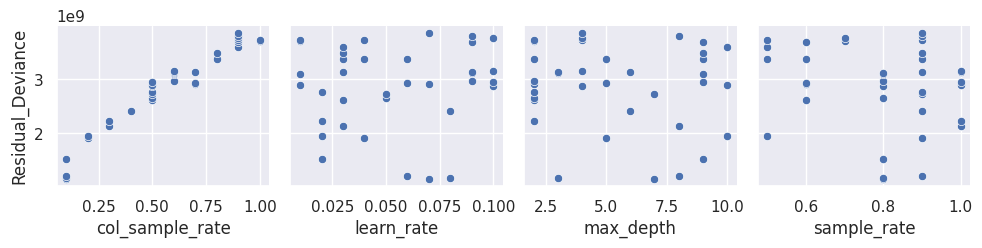

In [95]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# Conclusion



*   Built a predictive model using H2O AutoML to predict the quality of wine using certain attributes.
*   Studied the effects of Ridge and LASSO regularization on the GLM Model.
*   Studied the importance of variable using SHAP summary.
*   Performed the hyperparameterb tuning using Random Grid Search Method.







References

https://rstudio-pubs-static.s3.amazonaws.com/64286_2635bf8b05fb4423ac2968243211b46b.html
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e
https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb
https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb


MIT License


Copyright (c) 2023 Karan Raman Agrawal and AISkunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.